# Home Credit Default Risk

Análise de risco de crédito. O dataset está disponível em: https://www.kaggle.com/competitions/home-credit-default-risk/data

In [1]:
# Importando as bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

%matplotlib inline

# Exibir todas as colunas do DataFrame:
pd.set_option('display.max_columns', None)
pd.get_option('display.max_columns')

#Exibir 150 linhas:
pd.set_option("display.max_rows", 150)
pd.get_option("display.max_rows")

150

In [2]:
train = pd.read_csv('application_train.csv')

train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

---

# 1. Análise de Dados

A variável de interesse é **TARGET**, onde 0=Bom pagador e 1=Mau pagador.

In [3]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:>

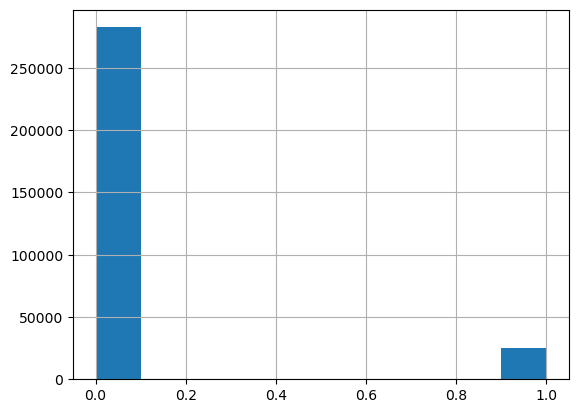

In [4]:
train['TARGET'].hist()

Analisando a distribuição das features, é possível notar que as classes são **desbalançeadas**. Por isso, teremos que traçar alguma estratégia para lidar com isso.

In [5]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## 1.1 Analisando dados faltantes

In [7]:
# Analisando a porcentagem de dados faltantes em cada uma das variáveis:

train.isna().mean().sort_values(ascending=False)

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_AVG                 0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

Nota-se que em algumas variáveis o número de dados faltantes é elevado. Dessa forma, vamos optar por excluir do modelo qualquer variável que tenha mais do que 40% dos valores como missing.

In [8]:
# Selecionando apenas as colunas cuja porcentagem de missing é menor que 40%

train = train.loc[:, train.isna().mean() < .40]

Agora vamos analisar as demais colunas com dados faltantes e elaborar uma estratégia para preenche-los:

In [9]:
missing_cols = train.columns[train.isnull().any()] #Selecionando todas as colunas que possuem algum dado ausente.

train[missing_cols].info() #Analisando as informações sobre as colunas que possuem dado ausente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_ANNUITY                 307499 non-null  float64
 1   AMT_GOODS_PRICE             307233 non-null  float64
 2   NAME_TYPE_SUITE             306219 non-null  object 
 3   OCCUPATION_TYPE             211120 non-null  object 
 4   CNT_FAM_MEMBERS             307509 non-null  float64
 5   EXT_SOURCE_2                306851 non-null  float64
 6   EXT_SOURCE_3                246546 non-null  float64
 7   OBS_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 8   DEF_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 9   OBS_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 10  DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 11  DAYS_LAST_PHONE_CHANGE      307510 non-null  float64
 12  AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 13  AMT_REQ_CREDIT

Nota-se que as colunas 'NAME_TYPE_SUITE' e 'OCCUPATION_TYPE' são objetos. Como apenas 0,4% de 'NAME_TYPE_SUITE' estão faltando, vamos excluir essas amostras. 'OCUPATION_TYPE' será preenchida pela moda depois da separação entre treino e validação.

In [10]:
train['NAME_TYPE_SUITE'].dropna(inplace=True)

As variáveis numéricas serão preenchidas pela média. No entanto, para evitar data leakage, não faremos isso agora, e sim depois da separação entre treino e validação.

---
# 2 Selecionando as features

Primeiramente, vamos analisar os coeficientes de correlação:

In [11]:
train.corr()['TARGET'].sort_values(ascending=False)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709
LIVE_REGION_NOT_WORK_REGION    0.002819


Para o modelo, iremos manter apenas as colunas que tem uma correlação de no mínimo 0,05. 

Agora vamos analisar as variáveis categóricas:

In [12]:
(train.groupby('CODE_GENDER').mean()['TARGET'])*100

CODE_GENDER
F       6.999328
M      10.141920
XNA     0.000000
Name: TARGET, dtype: float64

Aqui podemos notar que uma parcela ligereiramente menor das mulheres é má pagadora. Isso significa que o fato de ser mulher torna mais provável que a amostra seja uma boa pagadora. 

In [13]:
train.groupby('FLAG_OWN_CAR').mean()['TARGET']*100

FLAG_OWN_CAR
N    8.500227
Y    7.243730
Name: TARGET, dtype: float64

Nota-se que, embora pessoas que possuem carro sejam melhores pagadoras, a diferença é extremamente pequena.

In [14]:
train.groupby('FLAG_OWN_REALTY').mean()['TARGET']*100

FLAG_OWN_REALTY
N    8.324929
Y    7.961577
Name: TARGET, dtype: float64

Novamente, temos uma pequena diferença.

In [15]:
train.groupby('NAME_CONTRACT_TYPE').mean()['TARGET']*100

NAME_CONTRACT_TYPE
Cash loans         8.345913
Revolving loans    5.478329
Name: TARGET, dtype: float64

In [16]:
train.groupby('NAME_TYPE_SUITE').mean()['TARGET']*100

NAME_TYPE_SUITE
Children           7.376798
Family             7.494583
Group of people    8.487085
Other_A            8.775982
Other_B            9.830508
Spouse, partner    7.871592
Unaccompanied      8.183047
Name: TARGET, dtype: float64

In [17]:
(train.groupby('NAME_INCOME_TYPE').mean()['TARGET']*100).sort_values(ascending=False)

NAME_INCOME_TYPE
Maternity leave         40.000000
Unemployed              36.363636
Working                  9.588472
Commercial associate     7.484257
State servant            5.754965
Pensioner                5.386366
Businessman              0.000000
Student                  0.000000
Name: TARGET, dtype: float64

In [18]:
(train.groupby('NAME_EDUCATION_TYPE').mean()['TARGET']*100).sort_values(ascending=False)

NAME_EDUCATION_TYPE
Lower secondary                  10.927673
Secondary / secondary special     8.939929
Incomplete higher                 8.484966
Higher education                  5.355115
Academic degree                   1.829268
Name: TARGET, dtype: float64

In [19]:
(train.groupby('NAME_FAMILY_STATUS').mean()['TARGET']*100).sort_values(ascending=False) 

NAME_FAMILY_STATUS
Civil marriage          9.944584
Single / not married    9.807675
Separated               8.194234
Married                 7.559868
Widow                   5.824217
Unknown                 0.000000
Name: TARGET, dtype: float64

In [20]:
(train.groupby('NAME_HOUSING_TYPE').mean()['TARGET']*100).sort_values(ascending=False) 

NAME_HOUSING_TYPE
Rented apartment       12.313051
With parents           11.698113
Municipal apartment     8.539748
Co-op apartment         7.932264
House / apartment       7.795711
Office apartment        6.572411
Name: TARGET, dtype: float64

In [21]:
(train.groupby('OCCUPATION_TYPE').mean()['TARGET']*100).sort_values(ascending=False) 

OCCUPATION_TYPE
Low-skill Laborers       17.152413
Drivers                  11.326130
Waiters/barmen staff     11.275964
Security staff           10.742449
Laborers                 10.578770
Cooking staff            10.443996
Sales staff               9.631799
Cleaning staff            9.606705
Realty agents             7.856192
Secretaries               7.049808
Medicine staff            6.700246
Private service staff     6.598793
IT staff                  6.463878
HR staff                  6.394316
Core staff                6.303954
Managers                  6.214028
High skill tech staff     6.159930
Accountants               4.830327
Name: TARGET, dtype: float64

In [22]:
train.groupby('WEEKDAY_APPR_PROCESS_START').mean()['TARGET']*100

WEEKDAY_APPR_PROCESS_START
FRIDAY       8.146927
MONDAY       7.757227
SATURDAY     7.887274
SUNDAY       7.929053
THURSDAY     8.100255
TUESDAY      8.350494
WEDNESDAY    8.160357
Name: TARGET, dtype: float64

In [23]:
(train.groupby('ORGANIZATION_TYPE').mean()['TARGET']*100).sort_values(ascending=False)

ORGANIZATION_TYPE
Transport: type 3         15.754002
Industry: type 13         13.432836
Industry: type 8          12.500000
Restaurant                11.706240
Construction              11.679810
Cleaning                  11.153846
Industry: type 1          11.068335
Industry: type 3          10.616229
Realtor                   10.606061
Agriculture               10.472698
Trade: type 3             10.337915
Self-employed             10.173904
Industry: type 4          10.148233
Security                   9.978442
Trade: type 7              9.449623
Business Entity Type 3     9.299623
Transport: type 4          9.281215
Mobile                     9.148265
Trade: type 1              8.908046
Industry: type 11          8.653846
Business Entity Type 2     8.528381
Postal                     8.437645
Advertising                8.158508
Business Entity Type 1     8.138369
Industry: type 7           8.033665
Housing                    7.944557
Legal Services             7.868852
Transport:

---

Com todas essas análises feitas, podemos escolher quais features irão entrar para o nosso modelo. Podemos ver que algumas das que tiveram diferenças significativas foram: 'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'.

In [24]:
sel_col = ['TARGET', 'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 
           'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 
           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_3', 'EXT_SOURCE_2']

train_sel = train[sel_col]

train_sel.head()

,TARGET,CODE_GENDER,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_3,EXT_SOURCE_2
0,1,M,Cash loans,Working,Secondary / secondary special,House / apartment,Laborers,Business Entity Type 3,-9461,2,2,-1134.0,-2120,0,0.139376,0.262949
1,0,F,Cash loans,State servant,Higher education,House / apartment,Core staff,School,-16765,1,1,-828.0,-291,0,NaN,0.622246
2,0,M,Revolving loans,Working,Secondary / secondary special,House / apartment,Laborers,Government,-19046,2,2,-815.0,-2531,0,0.729567,0.555912
3,0,F,Cash loans,Working,Secondary / secondary special,House / apartment,Laborers,Business Entity Type 3,-19005,2,2,-617.0,-2437,0,NaN,0.650442
4,0,M,Cash loans,Working,Secondary / secondary special,House / apartment,Core staff,Religion,-19932,2,2,-1106.0,-3458,1,NaN,0.322738


---
# 3. Treino e Validação

Agora vamos treinar e validar o modelo.

Será criada uma pipeline para os dados categóricos e uma para os dados numéricos. Para as variáveis categóricas, os valores faltantes serão preenchidos com a moda. Para as variáveis numéricas, os valores faltantes serão preenchidos com a média, e será utilizado o StandardScaler para normalizar os dados.



In [25]:
#Separando as entradas e as saídas:

X = train_sel.drop('TARGET', axis=1)
y = train_sel[['TARGET']]

#Identificando as colunas numéricas e categóricas:
sel_nom = []
sel_ord = []
sel_num = []

for i in X.columns:
    if X[i].dtype == 'object':
        if (X[i].nunique()) > 3:
            sel_ord.append(i)

        else:
            sel_nom.append(i)

    else:
        sel_num.append(i)
        

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## 3.1 Imputando missings

In [43]:
from sklearn.impute import SimpleImputer

#Imputando nominais:
imp_nom = SimpleImputer(strategy='constant')
imp_nom.fit(X_train[sel_nom])
X_train[sel_nom] = imp_nom.transform(X_train[sel_nom])
X_test[sel_nom] = imp_nom.transform(X_test[sel_nom])

#Imputando ordinais:
imp_ord = SimpleImputer(strategy='constant')
imp_ord.fit(X_train[sel_ord])
X_train[sel_ord] = imp_ord.transform(X_train[sel_ord])
X_test[sel_ord] = imp_ord.transform(X_test[sel_ord])

#Imputando numéricos:
imp_num = SimpleImputer(strategy='constant')
imp_num.fit(X_train[sel_num])
X_train[sel_num] = imp_num.transform(X_train[sel_num])
X_test[sel_num] = imp_num.transform(X_test[sel_num])

## 3.2 Fazendo o encoding


In [45]:
from category_encoders import TargetEncoder

enc_nom = TargetEncoder(cols=sel_nom).fit(X_train, y_train)
X_train = enc_nom.transform(X_train)
X_test = enc_nom.transform(X_test)

enc_ord = TargetEncoder(cols=sel_ord).fit(X_train, y_train)
X_train = enc_ord.transform(X_train)
X_test = enc_ord.transform(X_test)

X_train.head()

C:\Users\Domingos\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Domingos\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
C:\Users\Domingos\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Domingos\anaconda3\lib\site-packages\category_encoders

,CODE_GENDER,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_3,EXT_SOURCE_2
271986,0.070340,0.083675,0.053446,0.08974,0.078015,0.065079,0.053592,-23480.0,2.0,2.0,-732.0,-4783.0,0.0,0.345785,0.528154
70475,0.070340,0.083675,0.096079,0.08974,0.078015,0.105024,0.104410,-23657.0,3.0,3.0,-1732.0,-4506.0,0.0,0.749022,0.554524
234278,0.070340,0.083675,0.053446,0.08974,0.078015,0.065079,0.053592,-24195.0,2.0,2.0,-2.0,-4124.0,0.0,0.267869,0.349323
29814,0.070340,0.083675,0.053446,0.08974,0.078015,0.065079,0.053592,-22354.0,2.0,2.0,-930.0,-4364.0,0.0,0.780144,0.333906
165307,0.101637,0.083675,0.096079,0.08974,0.078015,0.105024,0.073946,-10877.0,3.0,3.0,0.0,-3552.0,1.0,0.313917,0.554540


# 4. Testando modelos

## 4.1 Regressão Logística

In [49]:
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(class_weight='balanced')

lr.fit(X_train_scaled, y_train)
pred = lr.predict(X_test_scaled)

C:\Users\Domingos\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.69      0.95      0.80     40960
           1       0.60      0.14      0.23     20543

    accuracy                           0.68     61503
   macro avg       0.64      0.55      0.51     61503
weighted avg       0.66      0.68      0.61     61503



## 4.2 Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced')

dt.fit(X_train, y_train)
pred = dt.predict(X_test)

print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     57561
           1       0.10      0.13      0.12      3942

    accuracy                           0.87     61503
   macro avg       0.52      0.53      0.52     61503
weighted avg       0.89      0.87      0.88     61503

